<a href="https://colab.research.google.com/github/Harishchand83077/LSTM-stock-price-prediction/blob/main/Lstm_Stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

**Define start day to fetch the dataset from the yahoo finance library**

In [3]:
START = "2015-01-01"   #defines the starting date for fetching the stock data (January 1, 2015).
TODAY = date.today().strftime("%Y-%m-%d")    # dynamically fetches the current date using Python's date.today() function.

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data
data = load_data('AAPL')
df=data
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-01-02,24.347178,24.817063,23.906242,24.805927,212818400
1,2015-01-05,23.661272,24.195739,23.474210,24.115569,257142000
2,2015-01-06,23.663500,23.924052,23.300507,23.725854,263188400
3,2015-01-07,23.995312,24.095523,23.761482,23.872829,160423600
4,2015-01-08,24.917271,24.975172,24.206875,24.324905,237458000


In [4]:
df = df.drop(['Date'], axis = 1)
df.head()

<ipython-input-4-e54f1e21f52c>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date'], axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,24.347178,24.817063,23.906242,24.805927,212818400
1,23.661272,24.195739,23.474210,24.115569,257142000
2,23.663500,23.924052,23.300507,23.725854,263188400
3,23.995312,24.095523,23.761482,23.872829,160423600
4,24.917271,24.975172,24.206875,24.324905,237458000


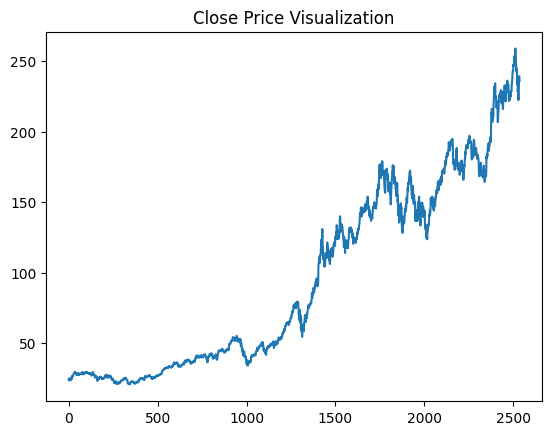

In [5]:
plt.title("Close Price Visualization")
plt.plot(df.Close)

**Plotting moving averages of 100 day**

In [6]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2531,232.870074
2532,233.027422
2533,233.214949
2534,233.369493


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

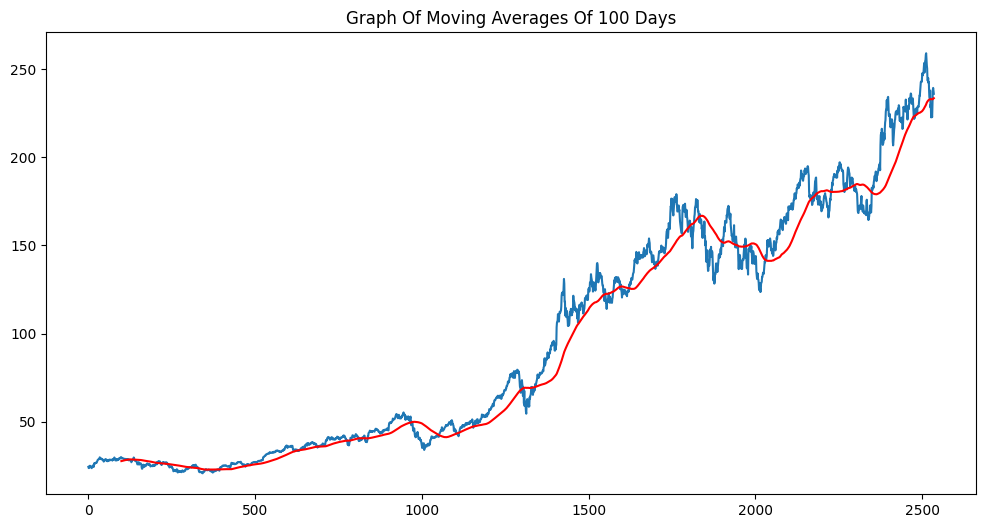

In [7]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.title('Graph Of Moving Averages Of 100 Days')

**Defining 200 days moving averages and plotting comparision graph with 100 days moving averages**

In [8]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2531,218.102988
2532,218.458412
2533,218.783168
2534,219.091550


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

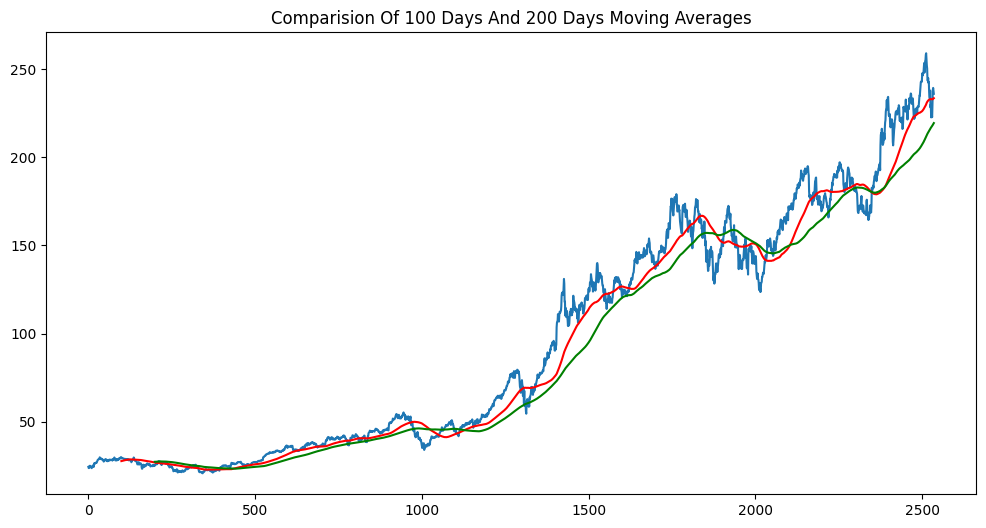

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [10]:
df.shape

(2536, 5)

**Spliting the dataset into training (70%) and testing (30%) set**

In [11]:
split_data=int(len(df)*0.7)
train=pd.DataFrame(df[:split_data])
test=pd.DataFrame(df[split_data:len(df)])
train.shape,test.shape

((1775, 5), (761, 5))

**Using MinMax scaler for normalization of the dataset**

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
train_close = train.iloc[:, 0:1].values
test_close = test.iloc[:, 0:1].values
data_training_array = scaler.fit_transform(train_close)
data_training_array


array([[0.02304536],
       [0.01871458],
       [0.01872865],
       ...,
       [0.94446308],
       [0.92414928],
       [0.90197163]])

In [18]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape

(1675, 100, 1)

In [23]:
x_test = []
y_test = []
test_scaled=scaler.transform(test_close)
for i in range(100, test_scaled.shape[0]):  # Start from index 100 to get full window
    x_test.append(test_scaled[i-100:i])  # Previous 100 days
    y_test.append(test_scaled[i, 0])  # Target: Next day's close price

x_test, y_test = np.array(x_test), np.array(y_test)


**ML model(LSTM)**

In [19]:
from tensorflow.keras.layers import Dense,Dropout,LSTM
from tensorflow.keras.models import Sequential


In [20]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=50,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 50)             │          22,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          82,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 141,441 (552.50 KB)

 Trainable params: 141,441 (552.50 KB)

 Non-trainable params: 0 (0.00 B)

**Training the data**

In [24]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['MAE'])
model.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 27s 334ms/step - MAE: 0.1616 - loss: 0.0597 - val_MAE: 0.1724 - val_loss: 0.0719
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 23s 374ms/step - MAE: 0.0531 - loss: 0.0064 - val_MAE: 0.0717 - val_loss: 0.0081
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 21s 393ms/step - MAE: 0.0460 - loss: 0.0057 - val_MAE: 0.0706 - val_loss: 0.0075
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 22s 418ms/step - MAE: 0.0435 - loss: 0.0051 - val_MAE: 0.1100 - val_loss: 0.0157
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 21s 394ms/step - MAE: 0.0402 - loss: 0.0041 - val_MAE: 0.1152 - val_loss: 0.0168
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 23s 437ms/step - MAE: 0.0457 - loss: 0.0056 - val_MAE: 0.1826 - val_loss: 0.0382
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 18s 343ms/step - MAE: 0.0440 - loss: 0.0049 - val_MAE: 0.1412 - val_loss: 0.0250
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 18s 339ms/step - MAE: 0.0415 - loss: 0.0043 - val_MAE: 0.0814 - val_loss: 0.0096
Epoch 9/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 19s 358ms/

In [25]:
model.save('keras_model.h5')


In [26]:
test_close.shape
test_close

array([[161.85862732],
       [159.79249573],
       [159.01519775],
       [157.20483398],
       [157.11633301],
       [156.65386963],
       [167.58483887],
       [171.96308899],
       [171.79585266],
       [173.00605774],
       [170.11338806],
       [169.82772827],
       [169.1085968 ],
       [172.23146057],
       [173.65991211],
       [169.56175232],
       [166.13343811],
       [166.36988831],
       [170.2217865 ],
       [169.98535156],
       [166.36988831],
       [164.81338501],
       [161.87767029],
       [157.69084167],
       [160.32118225],
       [162.39979553],
       [162.66577148],
       [160.77430725],
       [164.08439636],
       [163.75927734],
       [160.74473572],
       [156.93229675],
       [155.09994507],
       [160.52804565],
       [156.16386414],
       [152.4302063 ],
       [148.38130188],
       [152.78488159],
       [157.21795654],
       [158.23268127],
       [161.54272461],
       [162.92192078],
       [166.31079102],
       [167

In [27]:
past_100_days = pd.DataFrame(train_close[-100:])

In [28]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

In [30]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)
final_df.head()

,0
0,145.992004
1,150.432678
2,149.165283
3,149.833328
4,150.953323


In [31]:
input_data = scaler.fit_transform(final_df)
input_data
input_data.shape

(861, 1)

In [32]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(761, 100, 1)
(761,)


**Making prediction and plotting the graph of predicted vs actual values**


In [33]:
y_pred = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step


In [34]:
y_pred.shape

(761, 1)

In [35]:
y_test

array([2.81887429e-01, 2.66616801e-01, 2.60871848e-01, 2.47491581e-01,
       2.46837476e-01, 2.43419443e-01, 3.24209443e-01, 3.56568772e-01,
       3.55332740e-01, 3.64277278e-01, 3.42897767e-01, 3.40786476e-01,
       3.35471427e-01, 3.58552287e-01, 3.69109868e-01, 3.38820667e-01,
       3.13482245e-01, 3.15229832e-01, 3.43698932e-01, 3.41951458e-01,
       3.15229832e-01, 3.03725829e-01, 2.82028174e-01, 2.51083628e-01,
       2.70524284e-01, 2.85887164e-01, 2.87852973e-01, 2.73873298e-01,
       2.98337927e-01, 2.95934996e-01, 2.73654737e-01, 2.45477278e-01,
       2.31934499e-01, 2.72053197e-01, 2.39797848e-01, 2.12202654e-01,
       1.82277495e-01, 2.14824033e-01, 2.47588568e-01, 2.55088325e-01,
       2.79552615e-01, 2.89746154e-01, 3.14793048e-01, 3.24913959e-01,
       3.53018790e-01, 3.57751347e-01, 3.64158750e-01, 3.88623266e-01,
       3.79958752e-01, 3.56950408e-01, 3.54766263e-01, 3.84837242e-01,
       3.60227019e-01, 3.36709038e-01, 3.38966261e-01, 3.24039827e-01,
      

In [36]:
scaler.scale_

array([0.00739093])

In [37]:
scale_factor = 1/0.00985902
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

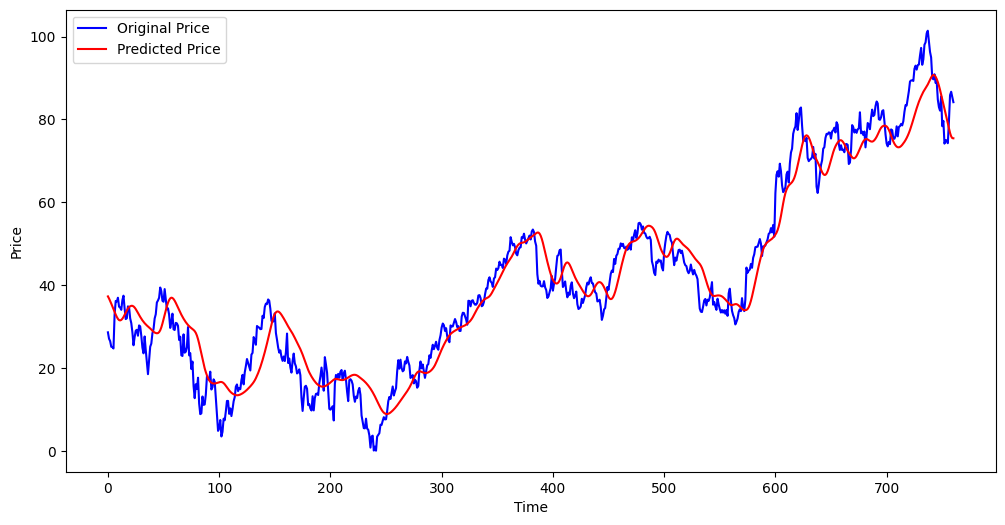

In [38]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

**Model Evaluation**

In [39]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error on test set: ", mae)

Mean absolute error on test set:  4.8530291583008855
